In [19]:
"""
Abdul Saboor
20L-1113
BDS-5A1

This is an implementation of convolution and correlation on image datasets.
"""
print() # for printing empty data

Height of image: 374
Width of image: 500
Channels of image: 3


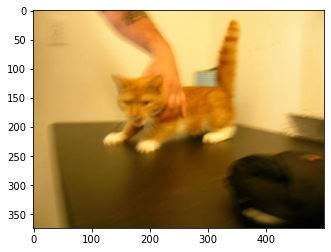

In [20]:
# reading image and displaying
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import copy
import json

img_no=0
img=mpimg.imread(f"Data/cat.{img_no}.jpg")
# img=mpimg.imread('sample image.jpeg')

plt.imshow(img)
print(f"Height of image: {img.shape[0]}")
print(f"Width of image: {img.shape[1]}")
print(f"Channels of image: {img.shape[2]}")

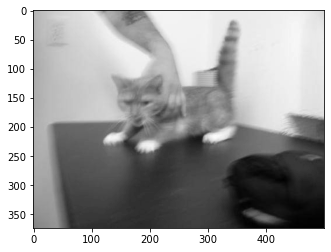

In [21]:
def to_grey(img):
    # Separating channels of image
    red,green,blue=img[:,:,0],img[:,:,1],img[:,:,2]

    # combining to a grayscale image by applying formula
    return((0.3*red)+(0.59*green)+(0.11*blue))
img=to_grey(copy.deepcopy(img))
plt.imshow(img,cmap='gray')

In [22]:
# creating a 3x3 simple filter

def mean_filter(img):
    for i in range(1,img.shape[0]-1): # traversing across height
        for j in range(1,img.shape[1]-1): # traversing across width
            sum = img[i-1][j-1] + img[i-1][j] + img[i-1][j+1]
            sum = sum + img[i][j-1] + img[i][j] + img[i][j+1]
            sum = sum + img[i+1][j-1] + img[i+1][j] + img[i+1][j+1]
            img[i][j]=sum/9
    return img

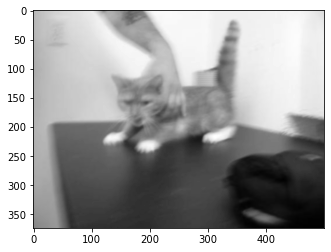

In [23]:
mean_img=mean_filter(copy.deepcopy(img))
plt.imshow(mean_img,cmap='gray')

In [24]:
def correlation_filter(img):
    for i in range(1,img.shape[0]-1): # traversing across height
        for j in range(1,img.shape[1]-1): # traversing across width
            sum = 0.25*img[i-1][j-1] + 0.5*img[i-1][j] + 0.25*img[i-1][j+1]
            sum = sum + 0.5*img[i][j-1] + 1*img[i][j] + 0.5*img[i][j+1]
            sum = sum + 0.25*img[i+1][j-1] + 0.5*img[i+1][j] + 0.25*img[i+1][j+1]
            img[i][j]=sum/4
    return img

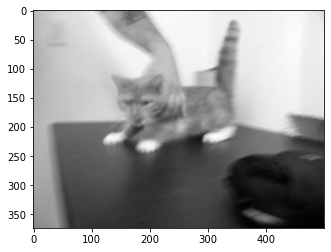

In [25]:
gausian_img=correlation_filter(copy.deepcopy(img))
plt.imshow(gausian_img,cmap='gray')

In [26]:
def convolution_filter(img):
    for i in range(1,img.shape[0]-1): # traversing across height
        for j in range(1,img.shape[1]-1): # traversing across width
            sum = 0.25*img[i+1][j+1] + 0.5*img[i+1][j] + 0.25*img[i+1][j-1]
            sum = sum + 0.5*img[i][j+1] + 1*img[i][j] + 0.5*img[i][j-1]
            sum = sum + 0.25*img[i-1][j+1] + 0.5*img[i-1][j] + 0.25*img[i-1][j-1]
            img[i][j]=sum/4
    return img

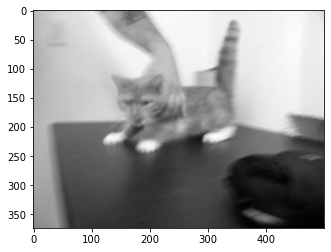

In [27]:
gausian_img=convolution_filter(copy.deepcopy(img))
plt.imshow(gausian_img,cmap='gray')

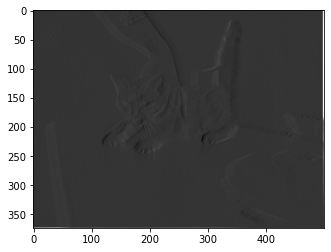

In [28]:
# first derivative filter

def dev1_filter(img):
    for i in range(img.shape[0]-1): # traversing across height
        for j in range(img.shape[1]-2): # traversing across width
            img[i][j]=img[i][j]+(-1*img[i][j+1])
    return img

dev1_img=dev1_filter(copy.deepcopy(img))
plt.imshow(dev1_img,cmap='gray')

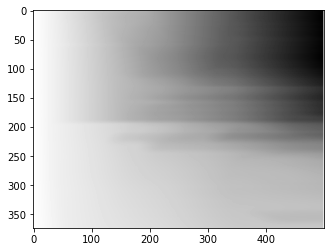

In [29]:
def dev2_filter(img):
    for i in range(img.shape[0]): # traversing across height
        for j in range(1,img.shape[1]-1): # traversing across width
            img[i][j]=img[i][j-1]+(-2*img[i][j])+img[i][j+1]
    return img

dev2_img=dev2_filter(copy.deepcopy(img))
plt.imshow(dev2_img,cmap='gray')

In [30]:
# saving image as json file
with open("Json_output.json","w") as outfile:
    json.dump(np.ndarray.tolist(img),outfile)

In [31]:
# creating a n x m filter

def nxm_arr(n,m,point):

    # working on width
    arr=[]
    temp=point
    for i in range(n):
        if(i<n//2):
            arr.append(temp)
            temp=temp*2
        else:
            arr.append(temp)
            temp=temp/2
    arr=np.array(arr) # converting to numpy array

    # working on length
    arr1=[]
    temp=1
    for i in range(m):
        if(i<m//2):
            arr1.append(temp*arr)
            temp=temp+1
        else:
            arr1.append(temp*arr)
            temp=temp-1
    
    return np.array(arr1)

In [32]:
arr=nxm_arr(3,3,0.25)
print(arr)
print(np.sum(arr))

[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]
4.0


In [33]:
# applying nxm filter to image
def nxm_filter(img,arr):
    fi=len(arr[0])//2
    fj=len(arr)//2
    for i in range(img.shape[0]-len(arr[0])//2-1): # traversing across height
        for j in range(img.shape[1]-len(arr)//2-1): # traversing across width
            sum=0
            for x in range(len(arr[0])):
                for y in range(len(arr)):
                    sum=sum+arr[x][y]*img[i+x][j+y]
            img[i+fi][j+fj]=sum/np.sum(arr)
    return img

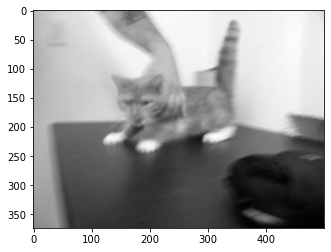

In [34]:
test_img=nxm_filter(copy.deepcopy(img),arr)
plt.imshow(test_img,cmap='gray')

In [35]:
# Noise Identification

"""
The type of noise in this image is gausian noise and can be easily solved by applying correlation filter as done in above examples
"""

'\nThe type of noise in this image is gausian noise and can be easily solved by applying correlation filter as done in above examples\n'